In [16]:
#Load packages
from netCDF4 import Dataset
import numpy as np
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import sys
import netCDF4 as nc
from torch import nn
from torch import optim
import progressbar
import pytorch_lightning as pl
import torch.nn.functional as F
from torchvision import transforms
from torch import nn
from torch import optim
import progressbar
#sys.path.append("/home2/datahome/tpicard/python/Python_Modules_p3_pyticles/")
sys.path.append("/home2/datahome/tpicard/PhD_MOMOPAR/CHAP2_APPLICATION_SAT/CNN_SSH_SST/")
sys.path.append("/home2/datahome/tpicard/PhD_MOMOPAR/CHAP2_APPLICATION_SAT/CNN_SSH_SST/TRAIN_AND_VAL_SSH_SST/")
sys.path.append("/home2/datahome/tpicard/PhD_MOMOPAR/CHAP2_APPLICATION_SAT/comparison_supermodel/Score_dx/test_data_sensibility/")

import torch
from torch.utils.data import DataLoader, Dataset
from CNN_tools import *
from CNN_UNET import *
from pytorch_lightning.callbacks import ModelCheckpoint
from DATALOADER import Pdf_Image_DataSet
from variables_training import *
import torch
from modules import image_concat,get_images_exp,downscalling_and_interpolation,lon,lat

plt.rcParams['lines.linewidth'] = 2
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50
plt.rcParams['xtick.labelsize'] = 18  # Taille des ticks sur l'axe des x
plt.rcParams['ytick.labelsize'] = 18  # Taille des ticks sur l'axe des y
plt.rcParams['axes.titlesize'] = 18  # Taille du titre
plt.rcParams['axes.labelsize'] = 18  # Taille du label de l'axe des x
plt.rcParams['lines.markersize'] = 10
plt.rcParams['font.size'] = '20.0'


In [3]:
#nc_file = nc.Dataset('mc_entropy.nc', 'r')
nc_file = nc.Dataset('/home/datawork-lemar-apero/tpicard/STAT_PDF/mc_entropy_200m_2000_2020.nc', 'r')


mc_base = nc_file.variables["mc_base"][:]
mc_simu = nc_file.variables["mc_simu"][:]
mc_sat = nc_file.variables["mc_sat"][:]

ent_base = nc_file.variables["ent_base"][:]
ent_simu = nc_file.variables["ent_simu"][:]
ent_sat = nc_file.variables["ent_sat"][:]


#for i in range(mc_simu.shape[0]):
mc_50th = np.percentile(mc_simu[:],50,axis=1)
mc_90th = np.percentile(mc_simu[:],90,axis=1)
mc_10th = np.percentile(mc_simu[:],10,axis=1)

entropy_50th = np.percentile(ent_simu[:],50,axis=1)
entropy_90th = np.percentile(ent_simu[:],90,axis=1)
entropy_10th = np.percentile(ent_simu[:],10,axis=1)

mc_50th_sat = np.percentile(mc_sat[:],50,axis=1)
mc_90th_sat = np.percentile(mc_sat[:],90,axis=1)
mc_10th_sat = np.percentile(mc_sat[:],10,axis=1)

entropy_50th_sat = np.percentile(ent_sat[:],50,axis=1)
entropy_90th_sat = np.percentile(ent_sat[:],90,axis=1)
entropy_10th_sat = np.percentile(ent_sat[:],10,axis=1)


mc_50th_base = np.percentile(mc_base[:],50,axis=1)
mc_90th_base = np.percentile(mc_base[:],90,axis=1)
mc_10th_base = np.percentile(mc_base[:],10,axis=1)




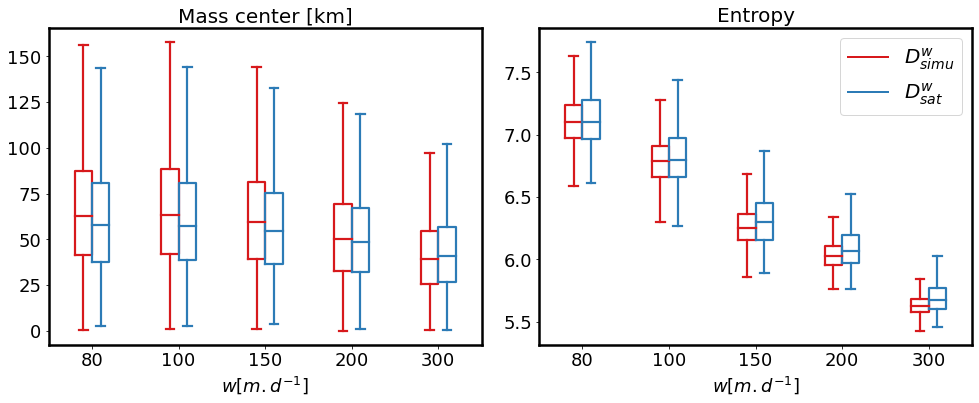

In [19]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1)
    
data_a = mc_simu.tolist()
data_b = mc_sat.tolist()
data_c = mc_base.tolist()

ticks = ['80', '100', '150','200','300']
linewidth_box = 2.2
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color,linewidth=linewidth_box)
    plt.setp(bp['whiskers'], color=color,linewidth=linewidth_box)
    plt.setp(bp['caps'], color=color,linewidth=linewidth_box)
    plt.setp(bp['medians'], color=color,linewidth=linewidth_box)


bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0-0.2, sym='', widths=0.4)
bpr = plt.boxplot(data_b, positions=np.array(range(len(data_b)))*2.0+0.2, sym='', widths=0.4)
#bprr = plt.boxplot(data_c, positions=np.array(range(len(data_c)))*2.0+0.4, sym='', widths=0.4)

set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')
#set_box_color(bprr, 'k')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='simu')
plt.plot([], c='#2C7BB6', label='sat')
#plt.plot([], c='k', label='baseline')
#plt.legend()

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-1, len(ticks)*2-1)
#plt.ylim(0, 8)
plt.xlabel("$w [m.d^{-1}]$")
#plt.ylabel("mass center [km]")
plt.title("Mass center [km]",size=20)
plt.tight_layout()
#plt.grid()


ax = fig.add_subplot(1,2,2)

data_a = ent_simu.tolist()
data_b = ent_sat.tolist()
data_c = ent_base.tolist()

ticks = ['80', '100', '150','200','300']


def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color,linewidth=linewidth_box)
    plt.setp(bp['whiskers'], color=color,linewidth=linewidth_box)
    plt.setp(bp['caps'], color=color,linewidth=linewidth_box)
    plt.setp(bp['medians'], color=color,linewidth=linewidth_box)

bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0-0.2, sym='', widths=0.4)
bpr = plt.boxplot(data_b, positions=np.array(range(len(data_b)))*2.0+0.2, sym='', widths=0.4)
#bprr = plt.boxplot(data_c, positions=np.array(range(len(data_c)))*2.0+0.4, sym='', widths=0.4)

set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')
#set_box_color(bprr, 'k')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='$D^{w}_{simu}$')
plt.plot([], c='#2C7BB6', label='$D^{w}_{sat}$')
#plt.plot([], c='k', label='baseline')
plt.legend()

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-1, len(ticks)*2-1)
#plt.ylim(0, 8)
plt.xlabel("$w [m.d^{-1}]$")
plt.title("Entropy",size=20)
plt.tight_layout()
#plt.grid()
plt.savefig("stat_mc_entropy.png",dpi=300,facecolor="white")

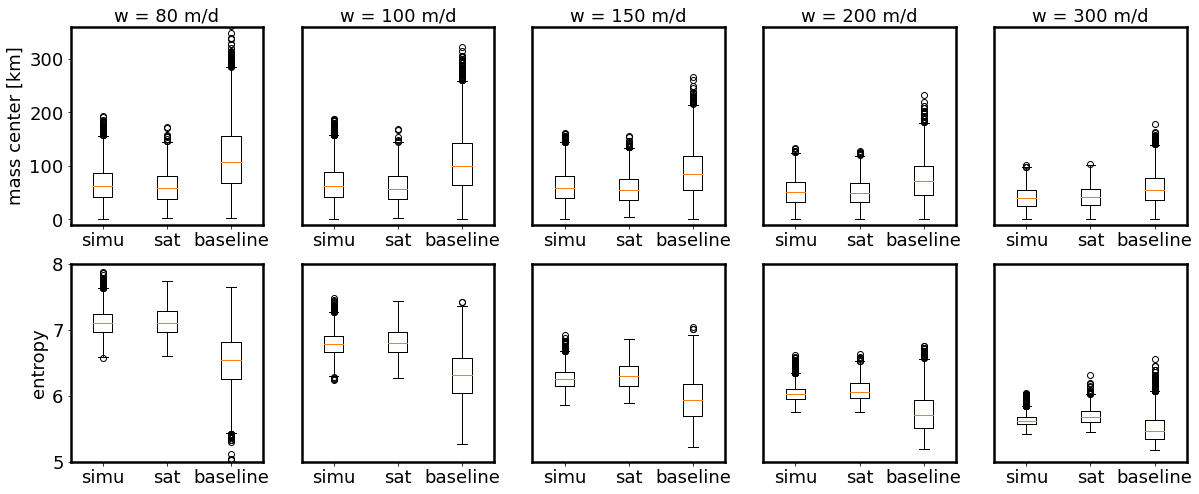

In [18]:
w_list = [80,100,150,200,300]
#mc_base = get_mass_center(pdf_filter_test[:,-1,:,:])

fig = plt.figure(figsize=(20,8))

i=0
for w in w_list:
    
    ax = fig.add_subplot(2,5,i+1)
    list_mass_center=[]
    list_mass_center=[mc_simu[i],mc_sat[i],mc_base[i]]
    plt.boxplot(list_mass_center)
    plt.xticks([1, 2, 3], ["simu","sat","baseline"])
    plt.title("w = {0} m/d".format(w))
    plt.ylim(-10,360)
    if i >0:
        plt.yticks([])
    else:
        plt.ylabel("mass center [km]")
        
    ax = fig.add_subplot(2,5,i+6)
    list_ent=[]
    list_ent=[ent_simu[i],ent_sat[i],ent_base[i]]
    plt.boxplot(list_ent)
    plt.xticks([1, 2, 3], ["simu","sat","baseline"])
    plt.ylim(5,8)
    if i >0:
        plt.yticks([])
    else:
        plt.ylabel("entropy")
    
    
        
    i=i+1
    
    #£plt.grid()
    
#plt.savefig("stat_mc_entropy.png",dpi=100)
    

/home2/datahome/tpicard/conda-env/croco/lib/python3.8/site-packages/numpy/lib/function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


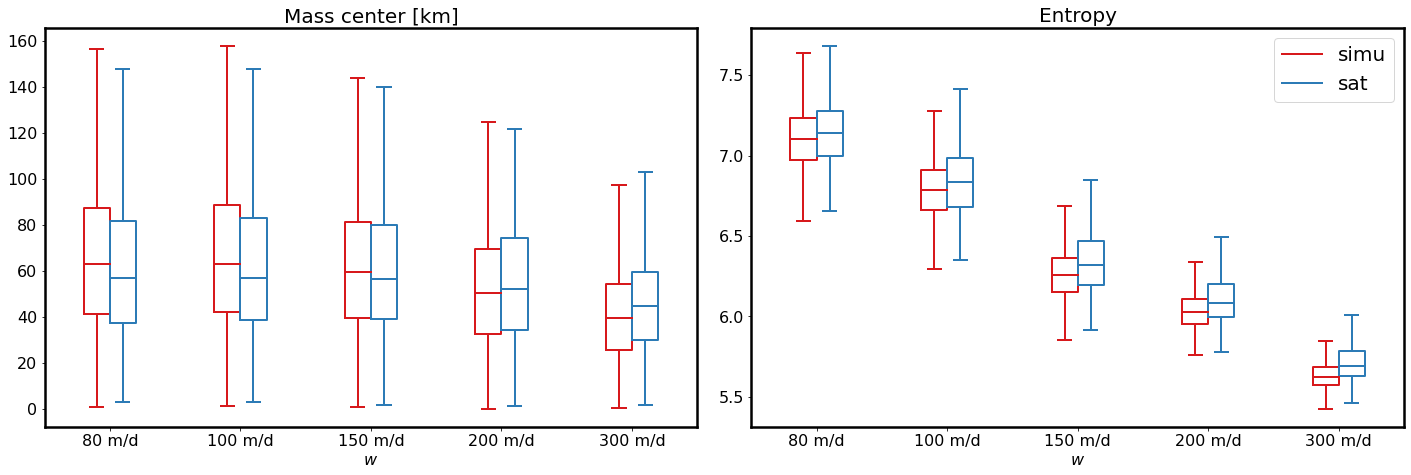

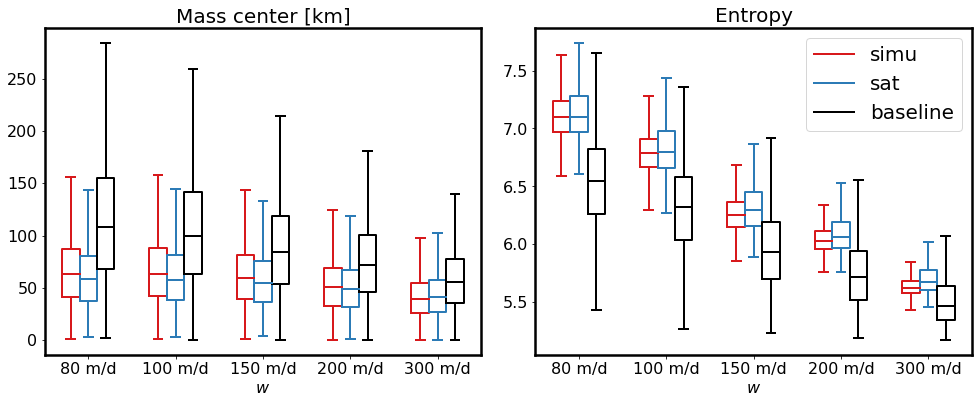

In [8]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1)
    
data_a = mc_simu.tolist()
data_b = mc_sat.tolist()
data_c = mc_base.tolist()

ticks = ['80 m/d', '100 m/d', '150 m/d','200 m/d','300 m/d']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color,linewidth=2)
    plt.setp(bp['whiskers'], color=color,linewidth=2)
    plt.setp(bp['caps'], color=color,linewidth=2)
    plt.setp(bp['medians'], color=color,linewidth=2)


bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0-0.4, sym='', widths=0.4)
bpr = plt.boxplot(data_b, positions=np.array(range(len(data_b)))*2.0+0, sym='', widths=0.4)
bprr = plt.boxplot(data_c, positions=np.array(range(len(data_c)))*2.0+0.4, sym='', widths=0.4)

set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')
set_box_color(bprr, 'k')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='simu')
plt.plot([], c='#2C7BB6', label='sat')
plt.plot([], c='k', label='baseline')
#plt.legend()

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-1, len(ticks)*2-1)
#plt.ylim(0, 8)
plt.xlabel("$w$")
#plt.ylabel("mass center [km]")
plt.title("Mass center [km]",size=20)
plt.tight_layout()
#plt.grid()


ax = fig.add_subplot(1,2,2)

data_a = ent_simu.tolist()
data_b = ent_sat.tolist()
data_c = ent_base.tolist()

ticks = ['80 m/d', '100 m/d', '150 m/d','200 m/d','300 m/d']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color,linewidth=2)
    plt.setp(bp['whiskers'], color=color,linewidth=2)
    plt.setp(bp['caps'], color=color,linewidth=2)
    plt.setp(bp['medians'], color=color,linewidth=2)

bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0-0.4, sym='', widths=0.4)
bpr = plt.boxplot(data_b, positions=np.array(range(len(data_b)))*2.0+0, sym='', widths=0.4)
bprr = plt.boxplot(data_c, positions=np.array(range(len(data_c)))*2.0+0.4, sym='', widths=0.4)

set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')
set_box_color(bprr, 'k')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='simu')
plt.plot([], c='#2C7BB6', label='sat')
plt.plot([], c='k', label='baseline')
plt.legend()

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-1, len(ticks)*2-1)
#plt.ylim(0, 8)
plt.xlabel("$w$")
plt.title("Entropy",size=20)
plt.tight_layout()
#plt.grid()
#plt.savefig("stat_mc_entropy.png",dpi=300,facecolor="white")

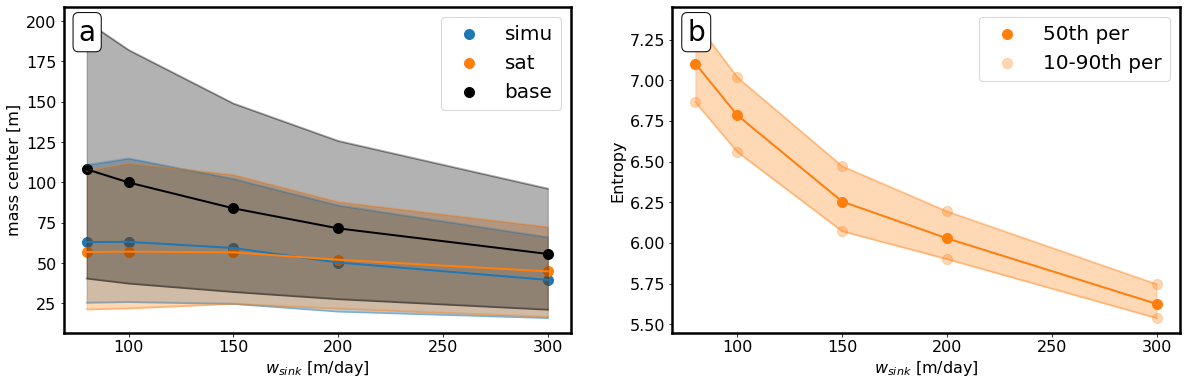

In [28]:
import matplotlib.transforms as mtransforms

fig = plt.figure(figsize=(20,6))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50
plt.rcParams['lines.markersize'] = 10
plt.rcParams['font.size'] = '20.0'

ax = fig.add_subplot(1,2,1)

label = 'a'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax.text(0.01, 0.98, label, transform=ax.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))

plt.plot(w_list,mc_50th,color="C0")
plt.plot(w_list,mc_10th,color="C0",alpha=0.3)
plt.plot(w_list,mc_90th,color="C0",alpha=0.3)
plt.fill_between(w_list,mc_10th,mc_90th,color="C0",alpha=0.3)
plt.scatter(w_list,mc_50th,color="C0",label='simu')

plt.plot(w_list,mc_50th_sat,color="C1")
plt.plot(w_list,mc_10th_sat,color="C1",alpha=0.3)
plt.plot(w_list,mc_90th_sat,color="C1",alpha=0.3)
plt.fill_between(w_list,mc_10th_sat,mc_90th_sat,color="C1",alpha=0.3)
plt.scatter(w_list,mc_50th_sat,color="C1",label='sat')

plt.plot(w_list,mc_50th_base,color="k")
plt.plot(w_list,mc_10th_base,color="k",alpha=0.3)
plt.plot(w_list,mc_90th_base,color="k",alpha=0.3)
plt.fill_between(w_list,mc_10th_base,mc_90th_base,color="k",alpha=0.3)
plt.scatter(w_list,mc_50th_base,color="k",label='base')


plt.xlabel("$w_{sink}$ [m/day]")
plt.ylabel("mass center [m]")


plt.legend()

ax = fig.add_subplot(1,2,2)

label = 'b'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax.text(0.01, 0.98, label, transform=ax.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))

plt.plot(w_list,entropy_50th,color="C1")
plt.plot(w_list,entropy_10th,color="C1",alpha=0.3)
plt.plot(w_list,entropy_90th,color="C1",alpha=0.3)
plt.fill_between(w_list,entropy_10th,entropy_90th,color="C1",alpha=0.3)
plt.xlabel("$w_{sink}$ [m/day]")
plt.ylabel("Entropy")

plt.scatter(w_list,entropy_50th,color="C1",label='50th per')
plt.scatter(w_list,entropy_10th,color="C1",alpha=0.3)
plt.scatter(w_list,entropy_90th,color="C1",alpha=0.3,label='10-90th per')

plt.legend()

# Entropy

In [26]:
#Add sat stats
def get_entropy(pred):

    list_entropy = np.zeros(pred.shape[0])
    for i in range(pred.shape[0]):
        list_entropy[i] = entropie(pred[i,:,:])
        
    return list_entropy

In [28]:
ent_simu = get_entropy(pred_simu)

In [30]:
ent_simu

array([5.50118457, 5.53262898, 5.60824795, ..., 5.57705497, 5.59465609,
       5.5529967 ])

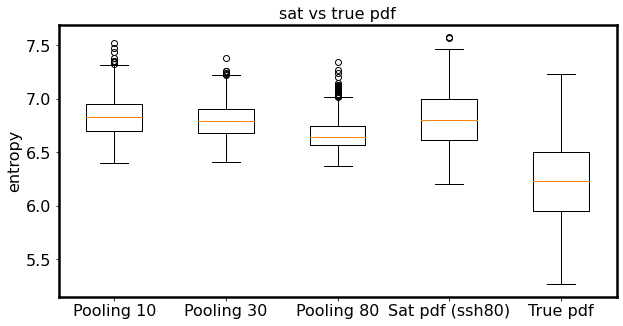

In [14]:
plt.boxplot(list_entropy)
plt.ylabel("entropy")
plt.xticks([1, 2, 3, 4, 5], pred_string)
plt.title("sat vs true pdf")
#plt.savefig("entropy_distribution_pool_model.png",dpi=100)